<a href="https://colab.research.google.com/github/WhalepigJun/Competition_CAUST/blob/main/st_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#응용통계학과 통계공모전

##library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##data

In [2]:
# 추정 매출 data
sales2013 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2013.csv", encoding="CP949")
sales2014 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2014.csv", encoding="CP949")
sales2015 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2015.csv", encoding="CP949")
sales2016 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016.csv", encoding="CP949")
sales2017 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017.csv", encoding="CP949")
sales2018 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv", encoding="CP949")
sales2019 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv", encoding="CP949")
sales2020 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020.csv", encoding="CP949")

In [3]:
# 2013년부터 2020년 데이터 칼럼명을 동일하게 세팅 (2017년을 기준으로 맞춤)
for i in range(2013,2021):
  locals()["sales" + str(i)].columns = sales2017.columns

In [4]:
sales = pd.concat([sales2013,sales2014,sales2015,sales2016,sales2017,sales2018,sales2019,sales2020])
sales["induty_cd"] = sales["svc_induty_cd"].str[:3]

In [5]:
# 추정 유동인구 data
f_pop = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정유동인구/서울시 우리마을가게 상권분석서비스(상권-추정유동인구)_2020.csv", encoding="CP949")

## 골목 식당 방영 상권 분석

 - 업종 : 외식업(CS1), 소매업(CS3)(서비스업(CS2) 제외) (업종코드)
 - 기간 : 각 상권 별 '골목식당' 방송 방영일 기준, 전년 동월부터 방송 후 현재까지의 데이터 (분기 데이터로 대체)

###18년 12월 : 용산 청파동 하숙골목
 - 엘깜비오 (서울 용산구 청파로43길 12)
 - 오복함흥냉면 (서울 용산구 한강대로84길 4)
 - 버거인 (서울 용산구 청파로43길 12 지하 1층)

1. 도보 5분 거리 상권 (골목상권, 전통시장) (발달상권, 관광특구 제외)
 - 청파로 47길 (골목상권)
 - 청파로 47나길 (골목상권)
 - 원효로 89길 (골목상권)
 - 한강대로 88길 (골목상권)
 - 두텁바위로 1길 (골목상권)

2. (추후) 평가가 좋고 나쁨에 따라서 
 - 평가 지표 : 시청률, 리뷰의 긍정 $\cdot$ 부정 반응

3. (추후) 임대료 상승
 - 젠트리피케이션


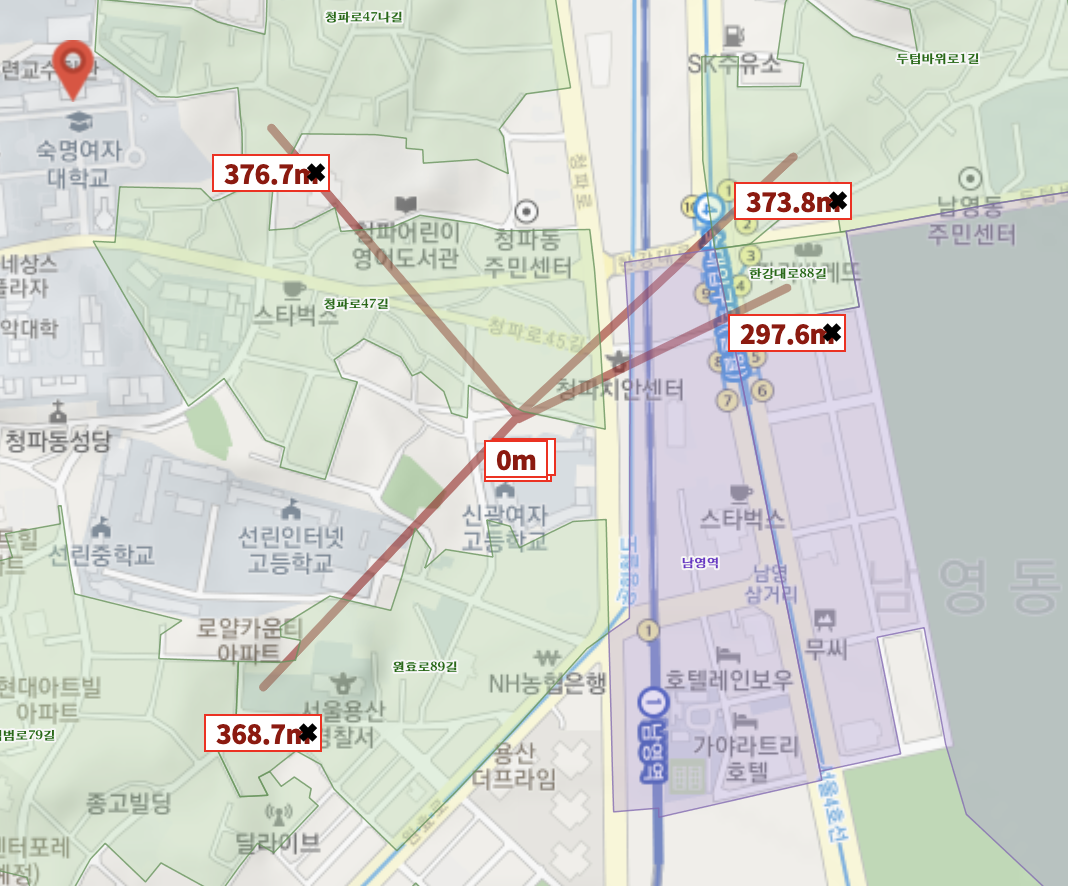

In [6]:
chungpadong = ["청파로47길", "청파로47나길", "원효로89길", "한강대로 88길", "두텁바위로1길"]

In [7]:
sales_chungpa = sales[sales["trdar_cd_nm"].isin(chungpadong) & sales["induty_cd"].isin(["CS1", "CS3"])]

[필요 칼럼]

["stdr_yy_cd", "stdr_qu_cd", "induty_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt",	"fml_selng_amt",	"agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt"]

\

칼럼 의미 (순서대로)

그룹 : 기준년코드, 기준분기코드, 상권구분(induty_cd)

당월매출금액, 당원매출건수, 남성매출금액, 여성매출금액, 10대매출금액, 20대매출금액, 30대매출금액, 40대매출금액, 50대매출금액, 60대이상매출금액

In [8]:
col = ["stdr_yy_cd", "stdr_qu_cd", "induty_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt",	"fml_selng_amt",	"agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt"]
col_ = ["stdr_yy_cd", "stdr_qu_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt",	"fml_selng_amt",	"agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt"]

In [9]:
rdf = sales_chungpa.groupby(["stdr_yy_cd", "stdr_qu_cd"]).sum().reset_index()[col_]

In [10]:
#rdf

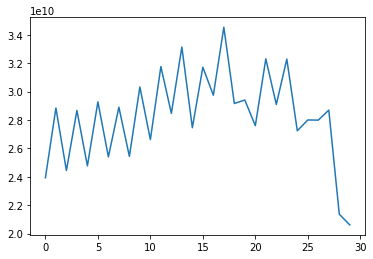

In [11]:
# 2013년 1분기부터 2020년 2분기까지 
plt.plot(rdf.thsmon_selng_amt, data=rdf)
plt.show()

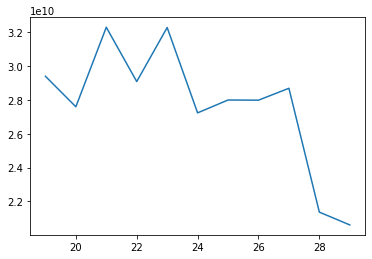

In [12]:
# 방송 방영 2018년 12월(4분기) : 23번째 데이터
# 즉, 전년 동월(동분기)부터 현재까지 : 19번째부터~현재
plt.plot(rdf.thsmon_selng_amt[19:])
plt.show()

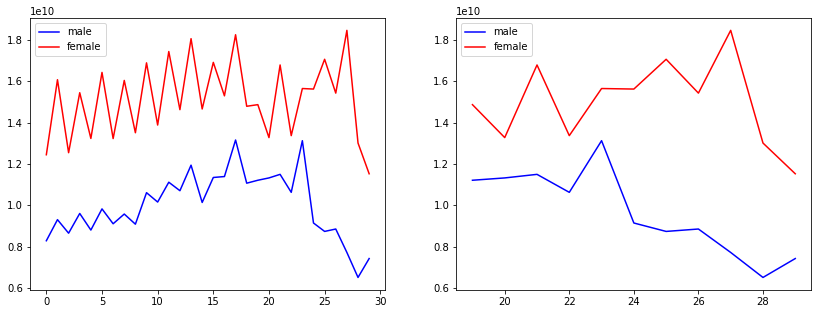

In [13]:
# 성별 나눠서
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(rdf.ml_selng_amt, label="male", color='b')
plt.plot(rdf.fml_selng_amt, label="female", color='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rdf.ml_selng_amt[19:], label="male", color='b')
plt.plot(rdf.fml_selng_amt[19:], label="female", color='r')
plt.legend()

plt.show()

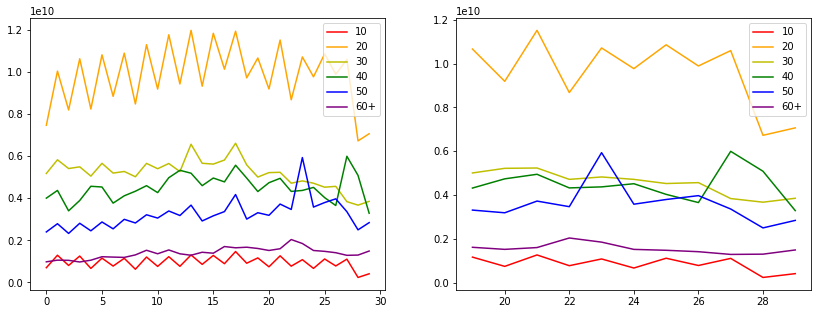

In [14]:
# 연령별
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(rdf.agrde_10_selng_amt, label="10", color='r')
plt.plot(rdf.agrde_20_selng_amt, label="20", color='orange')
plt.plot(rdf.agrde_30_selng_amt, label="30", color='y')
plt.plot(rdf.agrde_40_selng_amt, label="40", color='g')
plt.plot(rdf.agrde_50_selng_amt, label="50", color='b')
plt.plot(rdf.agrde_60_above_selng_amt, label="60+", color='purple')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rdf.agrde_10_selng_amt[19:], label="10", color='r')
plt.plot(rdf.agrde_20_selng_amt[19:], label="20", color='orange')
plt.plot(rdf.agrde_30_selng_amt[19:], label="30", color='y')
plt.plot(rdf.agrde_40_selng_amt[19:], label="40", color='g')
plt.plot(rdf.agrde_50_selng_amt[19:], label="50", color='b')
plt.plot(rdf.agrde_60_above_selng_amt[19:], label="60+", color='purple')
plt.legend()

plt.show()

추가적으로 하고 싶은 것

1. 외식업(CS1)과 소매업(CS3)으로 구분해서 

2. 소매업(CS3)에서 슈퍼마켓(CS300001)과 편의점(CS300002)만 선택한 결과
 - 다른 소매업보다 영향이 클 것 같아서

3. 

In [15]:
# 유동인구
f_pop_chungpa = f_pop[f_pop["상권_코드_명"].isin(chungpadong)]
f_pop_rdf = f_pop_chungpa.groupby(["기준 년코드", "기준_분기_코드"]).sum().reset_index()

In [16]:
#f_pop_rdf

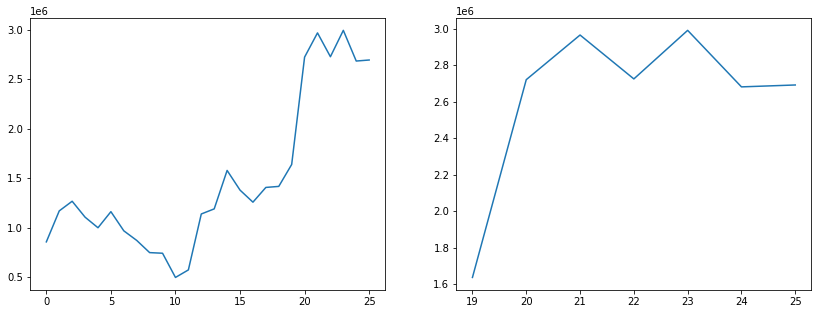

In [17]:
plt.figure(figsize=(14,5))
#전체
plt.subplot(1,2,1)
plt.plot(f_pop_rdf.총_유동인구_수)
#19번째부터
plt.subplot(1,2,2)
plt.plot(f_pop_rdf.총_유동인구_수[19:])
plt.show()

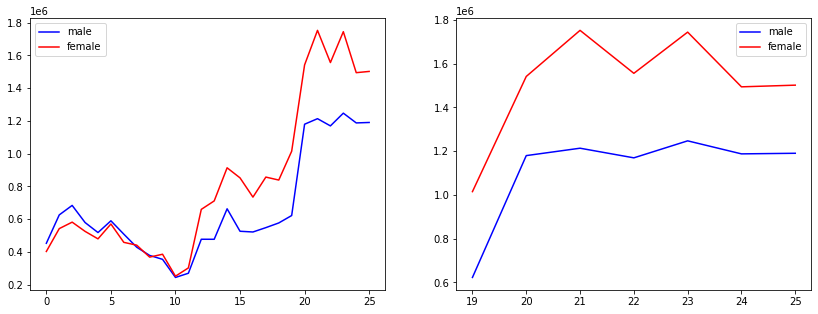

In [18]:
# 성별
plt.figure(figsize=(14,5))
#전체
plt.subplot(1,2,1)
plt.plot(f_pop_rdf.남성_유동인구_수, label="male", color="b")
plt.plot(f_pop_rdf.여성_유동인구_수, label="female", color="r")
plt.legend()

#19번째부터
plt.subplot(1,2,2)
plt.plot(f_pop_rdf.남성_유동인구_수[19:], label="male", color="b")
plt.plot(f_pop_rdf.여성_유동인구_수[19:], label="female", color="r")
plt.legend()
plt.show()

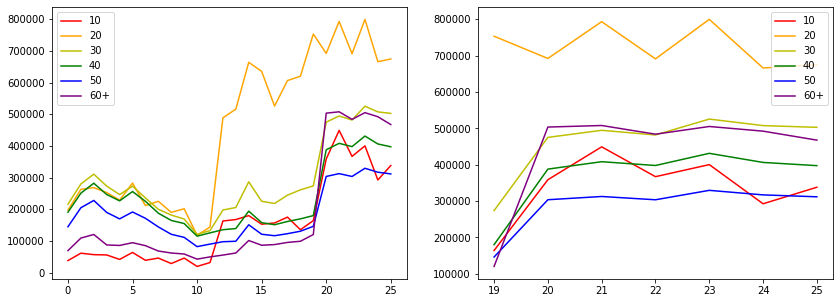

In [19]:
# 연령별
# 전체
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(f_pop_rdf.연령대_10_유동인구_수, label="10", color='r')
plt.plot(f_pop_rdf.연령대_20_유동인구_수, label="20", color='orange')
plt.plot(f_pop_rdf.연령대_30_유동인구_수, label="30", color='y')
plt.plot(f_pop_rdf.연령대_40_유동인구_수, label="40", color='g')
plt.plot(f_pop_rdf.연령대_50_유동인구_수, label="50", color='b')
plt.plot(f_pop_rdf.연령대_60_이상_유동인구_수, label="60+", color='purple')
plt.legend()

# 19번째부터
plt.subplot(1,2,2)
plt.plot(f_pop_rdf.연령대_10_유동인구_수[19:], label="10", color='r')
plt.plot(f_pop_rdf.연령대_20_유동인구_수[19:], label="20", color='orange')
plt.plot(f_pop_rdf.연령대_30_유동인구_수[19:], label="30", color='y')
plt.plot(f_pop_rdf.연령대_40_유동인구_수[19:], label="40", color='g')
plt.plot(f_pop_rdf.연령대_50_유동인구_수[19:], label="50", color='b')
plt.plot(f_pop_rdf.연령대_60_이상_유동인구_수[19:], label="60+", color='purple')
plt.legend()

plt.show()

###20년 09월 : 중곡동 시장 앞 골목
###데이터가 없음 - 20년 3분기 데이터 없음:(
 - 바삭알까스 (서울 광진구 능동로49길 15)
 - 부산어묵 중곡점 (서울 광진구 긴고랑로11길 29)
 - 강희자얼큰손만두국 (서울 광진구 능동로49길 16)


1. 도보 5분 거리 상권 (골목상권, 전통시장) (발달상권, 관광특구 제외)
 - 긴고랑로 9길
 - 중곡제일시장
 - 긴고랑로 7길
 - 긴고랑로 8길
 - 용마산로 21길
 - 긴고랑로 20길

2. (추후) 평가가 좋고 나쁨에 따라서 
 - 평가 지표 : 시청률, 리뷰의 긍정 $\cdot$ 부정 반응

3. (추후) 임대료 상승
 - 젠트리피케이션


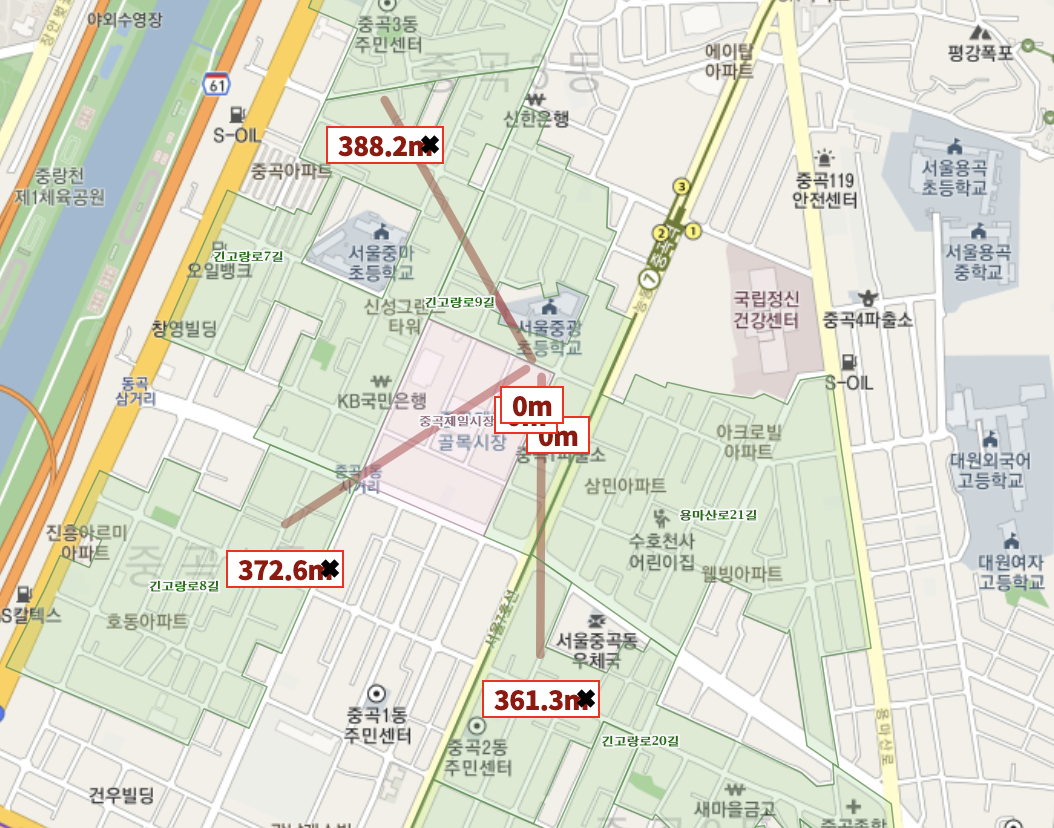

In [20]:
joonggokdong = ["긴고랑로9길", "중곡제일시장", "긴고랑로7길", "긴고랑로8길", "용마산로21길", "긴고랑로20길"]

In [21]:
sales_joonggok = sales[sales["trdar_cd_nm"].isin(joonggokdong) & sales["induty_cd"].isin(["CS1", "CS3"])]

[필요 칼럼]

["stdr_yy_cd", "stdr_qu_cd", "induty_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt",	"fml_selng_amt",	"agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt"]

\

칼럼 의미 (순서대로)

그룹 : 기준년코드, 기준분기코드, 상권구분(induty_cd)

당월매출금액, 당원매출건수, 남성매출금액, 여성매출금액, 10대매출금액, 20대매출금액, 30대매출금액, 40대매출금액, 50대매출금액, 60대이상매출금액

In [22]:
col = ["stdr_yy_cd", "stdr_qu_cd", "induty_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt",	"fml_selng_amt",	"agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt"]
col_ = ["stdr_yy_cd", "stdr_qu_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt",	"fml_selng_amt",	"agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt"]

In [23]:
rdf = sales_joonggok.groupby(["stdr_yy_cd", "stdr_qu_cd"]).sum().reset_index()[col_]

In [24]:
#rdf

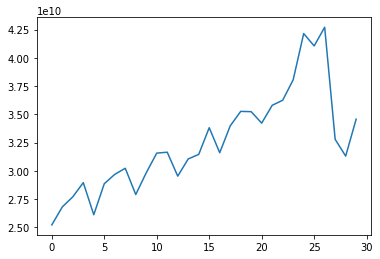

In [25]:
# 2013년 1분기부터 2020년 2분기까지 
plt.plot(rdf.thsmon_selng_amt, data=rdf)
plt.show()

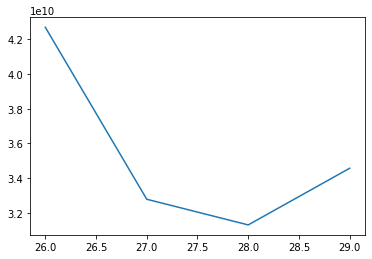

In [26]:
# 방송 방영 2020년 9월(3분기) : 데이터 없음..
# 즉, 전년 동월(동분기)부터 현재까지 : 26번째부터~현재
plt.plot(rdf.thsmon_selng_amt[26:])
plt.show()

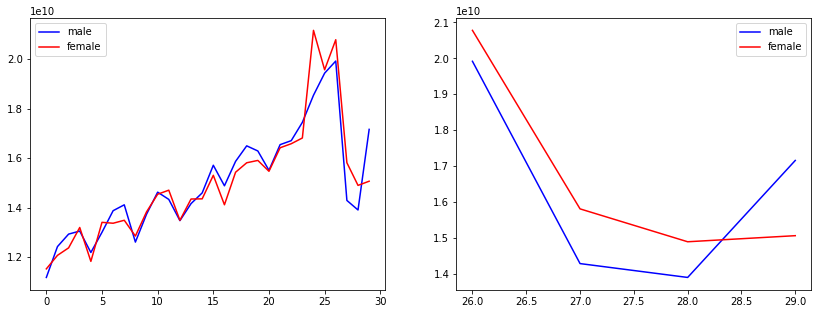

In [27]:
# 성별 나눠서
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(rdf.ml_selng_amt, label="male", color='b')
plt.plot(rdf.fml_selng_amt, label="female", color='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rdf.ml_selng_amt[26:], label="male", color='b')
plt.plot(rdf.fml_selng_amt[26:], label="female", color='r')
plt.legend()

plt.show()

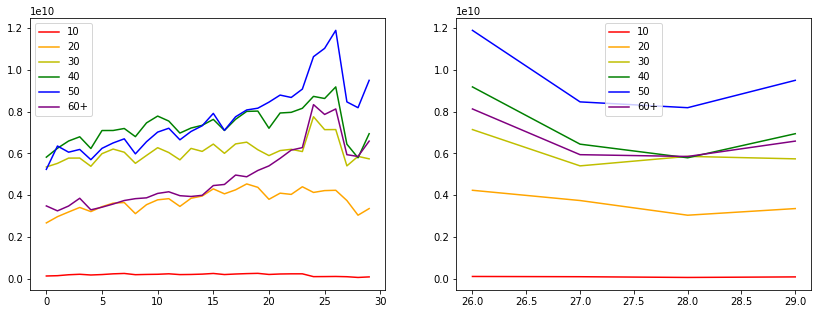

In [28]:
# 연령별
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(rdf.agrde_10_selng_amt, label="10", color='r')
plt.plot(rdf.agrde_20_selng_amt, label="20", color='orange')
plt.plot(rdf.agrde_30_selng_amt, label="30", color='y')
plt.plot(rdf.agrde_40_selng_amt, label="40", color='g')
plt.plot(rdf.agrde_50_selng_amt, label="50", color='b')
plt.plot(rdf.agrde_60_above_selng_amt, label="60+", color='purple')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rdf.agrde_10_selng_amt[26:], label="10", color='r')
plt.plot(rdf.agrde_20_selng_amt[26:], label="20", color='orange')
plt.plot(rdf.agrde_30_selng_amt[26:], label="30", color='y')
plt.plot(rdf.agrde_40_selng_amt[26:], label="40", color='g')
plt.plot(rdf.agrde_50_selng_amt[26:], label="50", color='b')
plt.plot(rdf.agrde_60_above_selng_amt[26:], label="60+", color='purple')
plt.legend()

plt.show()

In [29]:
# 유동인구
f_pop_chungpa = f_pop[f_pop["상권_코드_명"].isin(chungpadong)]
f_pop_rdf = f_pop_chungpa.groupby(["기준 년코드", "기준_분기_코드"]).sum().reset_index()

# 역시 3분기 데이터 없음..

In [30]:
#f_pop_rdf

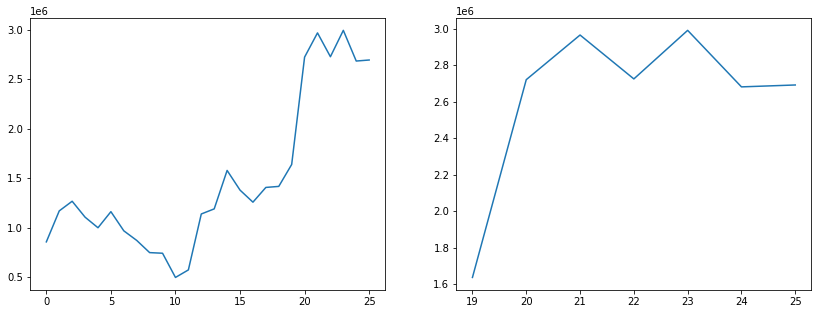

In [31]:
plt.figure(figsize=(14,5))
#전체
plt.subplot(1,2,1)
plt.plot(f_pop_rdf.총_유동인구_수)
#19번째부터
plt.subplot(1,2,2)
plt.plot(f_pop_rdf.총_유동인구_수[19:])
plt.show()

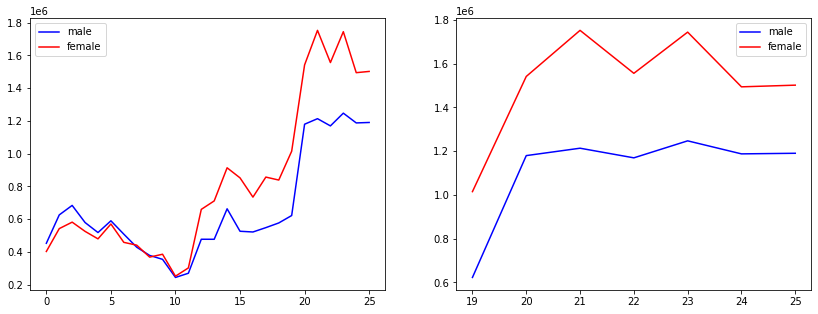

In [32]:
# 성별
plt.figure(figsize=(14,5))
#전체
plt.subplot(1,2,1)
plt.plot(f_pop_rdf.남성_유동인구_수, label="male", color="b")
plt.plot(f_pop_rdf.여성_유동인구_수, label="female", color="r")
plt.legend()

#19번째부터
plt.subplot(1,2,2)
plt.plot(f_pop_rdf.남성_유동인구_수[19:], label="male", color="b")
plt.plot(f_pop_rdf.여성_유동인구_수[19:], label="female", color="r")
plt.legend()
plt.show()

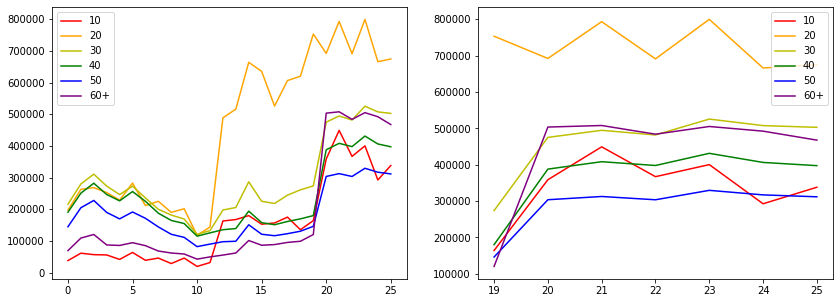

In [33]:
# 연령별
# 전체
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(f_pop_rdf.연령대_10_유동인구_수, label="10", color='r')
plt.plot(f_pop_rdf.연령대_20_유동인구_수, label="20", color='orange')
plt.plot(f_pop_rdf.연령대_30_유동인구_수, label="30", color='y')
plt.plot(f_pop_rdf.연령대_40_유동인구_수, label="40", color='g')
plt.plot(f_pop_rdf.연령대_50_유동인구_수, label="50", color='b')
plt.plot(f_pop_rdf.연령대_60_이상_유동인구_수, label="60+", color='purple')
plt.legend()

# 19번째부터
plt.subplot(1,2,2)
plt.plot(f_pop_rdf.연령대_10_유동인구_수[19:], label="10", color='r')
plt.plot(f_pop_rdf.연령대_20_유동인구_수[19:], label="20", color='orange')
plt.plot(f_pop_rdf.연령대_30_유동인구_수[19:], label="30", color='y')
plt.plot(f_pop_rdf.연령대_40_유동인구_수[19:], label="40", color='g')
plt.plot(f_pop_rdf.연령대_50_유동인구_수[19:], label="50", color='b')
plt.plot(f_pop_rdf.연령대_60_이상_유동인구_수[19:], label="60+", color='purple')
plt.legend()

plt.show()

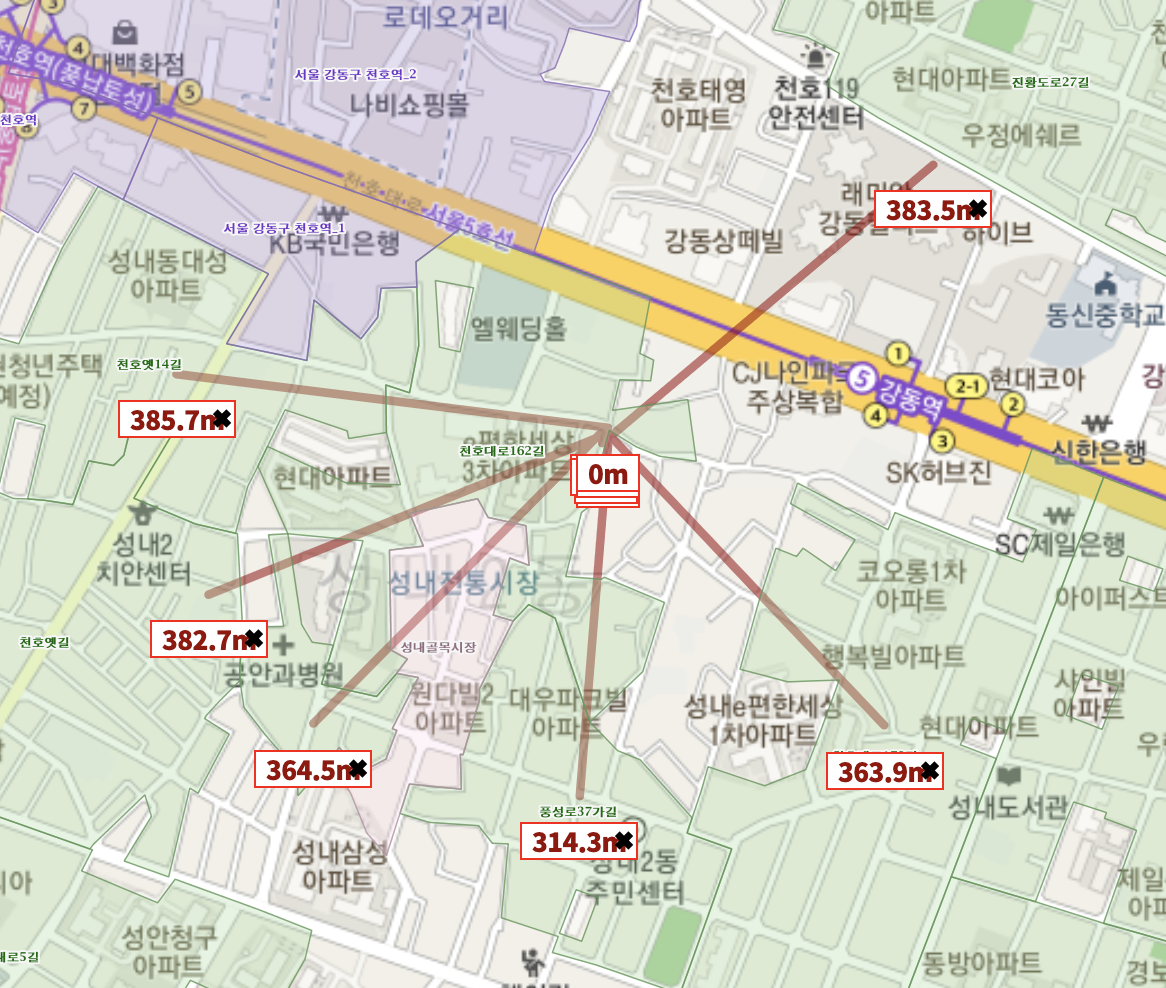